Контест №2. \\
Звонки в коллцентр

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faizullovairat","key":"d14fe7a00bebfdb3604c6d1cab831f75"}'}

Загрузим датасет

In [4]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c aim-2023-callcenter

 88% 49.0M/55.9M [00:01<00:00, 53.3MB/s]
100% 55.9M/55.9M [00:01<00:00, 55.2MB/s]


In [5]:
! unzip aim-2023-callcenter

Archive:  aim-2023-callcenter.zip
  inflating: sample_submission.csv   
  inflating: t1_webstat.csv          
  inflating: test.csv                
  inflating: train.csv               


In [6]:
data = pd.read_csv('train.csv')
data.shape

(104595, 19)

In [7]:
data.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,model_id,is_moderated,rating_value,rating_count,description_length,goods_qty,pics_qty,model_create_time,is_callcenter
0,1269921,1975-12-26 09:30:08,9896348,753,5,8.0,123777004,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
1,1270034,1975-12-26 10:28:57,9896348,753,1,2.0,123781654,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,0
2,1268272,1975-12-25 11:24:28,9896348,753,2,3.0,123591002,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
3,1270544,1975-12-26 14:16:06,9896348,753,1,1.0,123832302,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
4,1270970,1975-12-26 18:21:47,9896348,753,3,56.0,123881603,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,0


In [8]:
data.dtypes

order_id                int64
create_time            object
good_id                 int64
price                   int64
utm_medium              int64
utm_source            float64
sessionkey_id           int64
category_id             int64
parent_id               int64
root_id                 int64
model_id                int64
is_moderated            int64
rating_value          float64
rating_count          float64
description_length      int64
goods_qty               int64
pics_qty                int64
model_create_time      object
is_callcenter           int64
dtype: object

Исследуем признаки

Исследуем признак is_moderated (BAD)

In [9]:
check_modearted = data[['is_moderated', 'is_callcenter']]
check_modearted.groupby(['is_moderated']).mean()

,is_callcenter
is_moderated,
0,0.290588
1,0.357978


Видим, что признак не даёт много информации

Проверим признак utm_medium (GOOD)

In [10]:
check_modearted = data[['utm_medium', 'is_callcenter']]
dt = check_modearted.groupby('utm_medium').mean()
dt = dt.reset_index()
dt

,utm_medium,is_callcenter
0,1,0.379968
1,2,0.297569
2,3,0.353304
3,4,0.440978
4,5,0.391586
5,6,0.164600
6,7,0.279736
7,8,0.177866


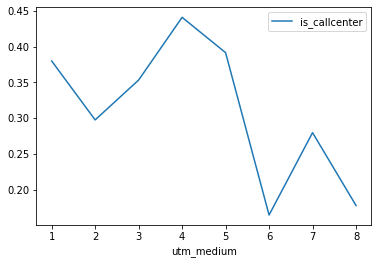

In [11]:
dt.plot(x = 'utm_medium', y='is_callcenter', kind='line')
plt.show()

Видим корреляцию

Проверим признак price (ВAD)

In [12]:
check_price = data[['price', 'is_callcenter']]
dt = check_price.groupby('price').mean()
dt = dt.reset_index()
dt

,price,is_callcenter
0,1,0.142857
1,2,0.000000
2,3,0.200000
3,4,0.142857
4,5,0.300000
...,...,...
6357,56092,0.000000
6358,56949,0.000000
6359,58599,1.000000
6360,60510,0.000000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


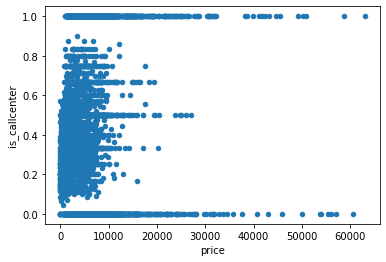

In [13]:
idx = dt['price'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'price', y='is_callcenter', kind='scatter')
plt.show()

НЕ видно никакой корреляции

Проверим признак utm_source (BAD)

In [14]:
check_price = data[['utm_source', 'is_callcenter']]
dt = check_price.groupby('utm_source').mean()
dt = dt.reset_index()
dt

,utm_source,is_callcenter
0,1.0,0.412580
1,2.0,0.323613
2,3.0,0.331892
3,4.0,0.168011
4,5.0,0.244186
...,...,...
283,540.0,0.000000
284,544.0,0.000000
285,546.0,1.000000
286,554.0,0.000000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


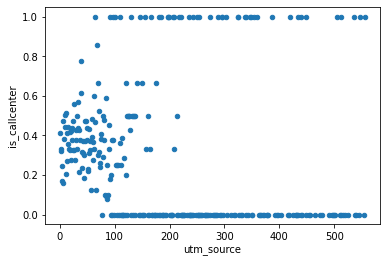

In [15]:
idx = dt['utm_source'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'utm_source', y='is_callcenter', kind='scatter')
plt.show()

Этот признак также выглядит бесполезным

pics_qty	(MB)

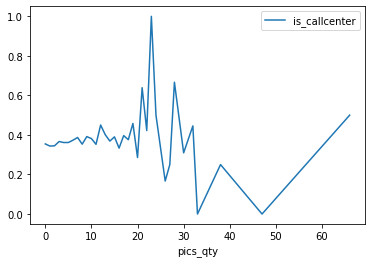

In [16]:
check_price = data[['pics_qty', 'is_callcenter']]
dt = check_price.groupby('pics_qty').mean()
dt = dt.reset_index()

idx = dt['pics_qty'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'pics_qty', y='is_callcenter', kind='line')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


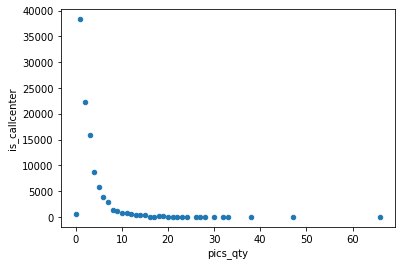

In [17]:
check_price = data[['pics_qty', 'is_callcenter']]
dt = check_price.groupby('pics_qty').count()
dt = dt.reset_index()

idx = dt['pics_qty'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'pics_qty', y='is_callcenter', kind='scatter')
plt.show()

goods_qty (GOOD)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


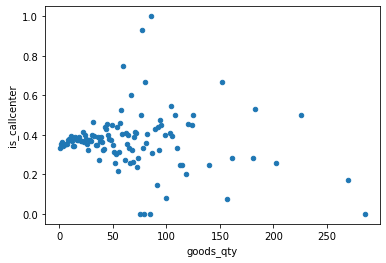

In [18]:
check_price = data[['goods_qty', 'is_callcenter']]
dt = check_price.groupby('goods_qty').mean()
dt = dt.reset_index()

idx = dt['goods_qty'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'goods_qty', y='is_callcenter', kind='scatter')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


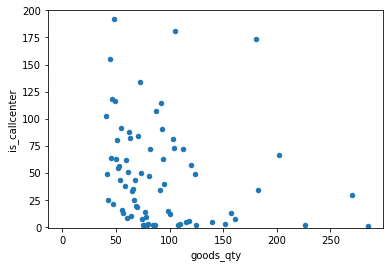

In [19]:
check_price = data[['goods_qty', 'is_callcenter']]
dt = check_price.groupby('goods_qty').count()
dt = dt.reset_index()

idx = dt['goods_qty'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'goods_qty', y='is_callcenter', kind='scatter')
plt.ylim(-1, 200.0)
plt.show()

description_length (BAD)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


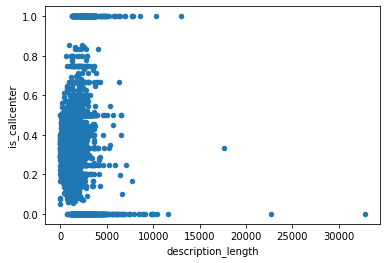

In [20]:
check_price = data[['description_length', 'is_callcenter']]
dt = check_price.groupby('description_length').mean()
dt = dt.reset_index()

idx = dt['description_length'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'description_length', y='is_callcenter', kind='scatter')
plt.show()

rating_count (GOOD)

In [21]:
check_price = data[['rating_count', 'is_callcenter']]
dt = check_price.groupby('rating_count').mean()
dt = dt.reset_index()
dt

,rating_count,is_callcenter
0,0.0,0.367998
1,1.0,0.359039
2,2.0,0.365881
3,3.0,0.357060
4,4.0,0.352601
5,5.0,0.369783
6,6.0,0.319742
7,7.0,0.398630
8,8.0,0.343750
9,9.0,0.354274


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


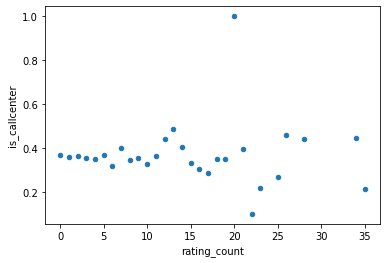

In [22]:
check_price = data[['rating_count', 'is_callcenter']]
dt = check_price.groupby('rating_count').mean()
dt = dt.reset_index()

idx = dt['rating_count'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'rating_count', y='is_callcenter', kind='scatter')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


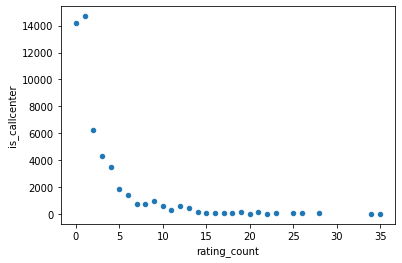

In [23]:
check_price = data[['rating_count', 'is_callcenter']]
dt = check_price.groupby('rating_count').count()
dt = dt.reset_index()

idx = dt['rating_count'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'rating_count', y='is_callcenter', kind='scatter')
plt.show()

rating_value (GOOD)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


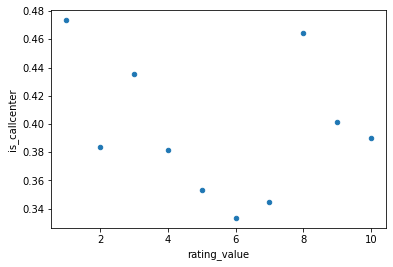

In [24]:
check_price = data[['rating_value', 'is_callcenter']]
dt = check_price.groupby('rating_value').mean()
dt = dt.reset_index()

idx = dt['rating_value'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'rating_value', y='is_callcenter', kind='scatter')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


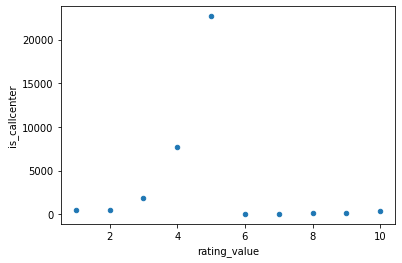

In [25]:
check_price = data[['rating_value', 'is_callcenter']]
dt = check_price.groupby('rating_value').count()
dt = dt.reset_index()

idx = dt['rating_value'].sort_values().index
dt = dt.reindex(idx)
dt.plot(x = 'rating_value', y='is_callcenter', kind='scatter')
plt.show()

In [26]:
y_train = data['is_callcenter']
print(y_train)

0         1
1         0
2         1
3         1
4         0
         ..
104590    1
104591    1
104592    0
104593    1
104594    0
Name: is_callcenter, Length: 104595, dtype: int64


###t1_wbstat.csv

In [27]:
webstat = pd.read_csv('t1_webstat.csv')
webstat.shape

(3334243, 10)

In [28]:
webstat.head()

,sessionkey_id,date_time,page_type,pageview_number,pageview_duration_sec,category_id,model_id,good_id,price,product_in_sale
0,122243978,1975-12-18 14:52:38.130,2,28,53.0,1773.0,NaN,NaN,NaN,NaN
1,122243978,1975-12-18 15:02:32.403,5,36,163.0,NaN,NaN,NaN,NaN,NaN
2,122243978,1975-12-18 15:08:11.147,5,40,156.0,NaN,NaN,NaN,NaN,NaN
3,122243992,1975-12-18 14:23:33.177,1,4,565.0,3973.0,26706175.0,45171119.0,8436.0,1.0
4,122243992,1975-12-18 14:32:58.763,1,5,73.0,3973.0,17297250.0,65195750.0,6624.0,1.0


In [29]:
data.dtypes

order_id                int64
create_time            object
good_id                 int64
price                   int64
utm_medium              int64
utm_source            float64
sessionkey_id           int64
category_id             int64
parent_id               int64
root_id                 int64
model_id                int64
is_moderated            int64
rating_value          float64
rating_count          float64
description_length      int64
goods_qty               int64
pics_qty                int64
model_create_time      object
is_callcenter           int64
dtype: object

In [30]:
webstat.dtypes

sessionkey_id              int64
date_time                 object
page_type                  int64
pageview_number            int64
pageview_duration_sec    float64
category_id              float64
model_id                 float64
good_id                  float64
price                    float64
product_in_sale          float64
dtype: object

In [31]:
webstat.date_time = pd.to_datetime(webstat.date_time, format="%Y-%m-%d %H:%M:%S")

In [32]:
session_agg = webstat.groupby('sessionkey_id', sort=False).agg(
    all_pages=('pageview_number', lambda x: max(x)),
    number_of_actions=('pageview_number', lambda x: len(x)),
    mean_price = ('price', lambda x: np.nanmean(x)),
    total_sec_dt=('date_time', lambda x: (x.iloc[-1] - x.iloc[0])), 
    total_sec_dur=('pageview_duration_sec', lambda x: np.nansum(x)), 
    ends_nan=('pageview_duration_sec', lambda x: int(pd.isna(x.iloc[-1]))), 
    last_page_type=('page_type', lambda x: x.iloc[-1]),
    start_date = ('date_time', lambda x: min(x)),
    mean_page = ('page_type', lambda x: np.nanmean(x)),
    max_stop_page = ('pageview_duration_sec', lambda x: max(x)),
    mean_stop_page = ('pageview_duration_sec', lambda x: np.nanmean(x))
)
    
session_agg

<ipython-input-32-32293d5b4646>:4: RuntimeWarning: Mean of empty slice
  mean_price = ('price', lambda x: np.nanmean(x)),
<ipython-input-32-32293d5b4646>:12: RuntimeWarning: Mean of empty slice
  mean_stop_page = ('pageview_duration_sec', lambda x: np.nanmean(x))


,all_pages,number_of_actions,mean_price,total_sec_dt,total_sec_dur,ends_nan,last_page_type,start_date,mean_page,max_stop_page,mean_stop_page
sessionkey_id,,,,,,,,,,,
122243978,41,41,746.384615,0 days 00:18:09.843000,3032.0,1,2,1975-12-18 14:20:15.210,2.682927,424.0,75.800000
122243992,8,8,7566.666667,0 days 00:10:38.086000,964.0,0,1,1975-12-18 14:20:18.877,4.375000,565.0,137.714286
122243998,5,5,598.500000,-1 days +23:58:34.210000,150.0,0,8,1975-12-18 14:20:20.760,5.200000,86.0,37.500000
122244115,2,2,1051.000000,0 days 00:01:01.527000,62.0,1,1,1975-12-18 14:20:53.793,4.000000,62.0,62.000000
122244260,55,40,444.888889,0 days 00:28:09.940000,1376.0,0,1,1975-12-18 14:21:30.973,2.750000,173.0,35.282051
...,...,...,...,...,...,...,...,...,...,...,...
118720116,2,2,NaN,0 days 00:03:12.706000,192.0,1,1,1975-12-01 14:01:55.157,1.500000,192.0,192.000000
118720198,2,2,2239.000000,0 days 00:00:34.250000,34.0,1,1,1975-12-01 14:02:17.053,1.500000,34.0,34.000000
118721114,1,1,60.000000,0 days 00:00:00,0.0,1,1,1975-12-01 14:05:33.433,1.000000,NaN,NaN


In [33]:
save = session_agg

In [34]:
# session_agg['start_date'] = session_agg['start_date'].astype('timedelta64[s]')

In [35]:
session_agg['total_sec_dt'] = session_agg['total_sec_dt'].astype('timedelta64[s]')
session_agg['sec_diff'] = session_agg['total_sec_dt'] - session_agg['total_sec_dur']
session_agg.reset_index(inplace=True)

In [36]:
session_agg

,sessionkey_id,all_pages,number_of_actions,mean_price,total_sec_dt,total_sec_dur,ends_nan,last_page_type,start_date,mean_page,max_stop_page,mean_stop_page,sec_diff
0,122243978,41,41,746.384615,1089.0,3032.0,1,2,1975-12-18 14:20:15.210,2.682927,424.0,75.800000,-1943.0
1,122243992,8,8,7566.666667,638.0,964.0,0,1,1975-12-18 14:20:18.877,4.375000,565.0,137.714286,-326.0
2,122243998,5,5,598.500000,-86.0,150.0,0,8,1975-12-18 14:20:20.760,5.200000,86.0,37.500000,-236.0
3,122244115,2,2,1051.000000,61.0,62.0,1,1,1975-12-18 14:20:53.793,4.000000,62.0,62.000000,-1.0
4,122244260,55,40,444.888889,1689.0,1376.0,0,1,1975-12-18 14:21:30.973,2.750000,173.0,35.282051,313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328425,118720116,2,2,NaN,192.0,192.0,1,1,1975-12-01 14:01:55.157,1.500000,192.0,192.000000,0.0
328426,118720198,2,2,2239.000000,34.0,34.0,1,1,1975-12-01 14:02:17.053,1.500000,34.0,34.000000,0.0
328427,118721114,1,1,60.000000,0.0,0.0,1,1,1975-12-01 14:05:33.433,1.000000,NaN,NaN,0.0
328428,118721222,1,1,717.000000,0.0,0.0,1,1,1975-12-01 14:05:59.507,1.000000,NaN,NaN,0.0


In [37]:
X = data.merge(session_agg, how='left', on='sessionkey_id', sort=False)

In [38]:
X['create_time'] = pd.to_datetime(X.create_time, format="%Y-%m-%d %H:%M:%S")

In [39]:
X.shape

(104595, 31)

In [40]:
X.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,...,mean_price,total_sec_dt,total_sec_dur,ends_nan,last_page_type,start_date,mean_page,max_stop_page,mean_stop_page,sec_diff
0,1269921,1975-12-26 09:30:08,9896348,753,5,8.0,123777004,139,133,124,...,753.000000,0.0,0.0,1.0,1.0,1975-12-26 09:21:03.393,1.000000,NaN,NaN,0.0
1,1270034,1975-12-26 10:28:57,9896348,753,1,2.0,123781654,139,133,124,...,984.666667,1215.0,3831.0,0.0,2.0,1975-12-26 09:50:26.857,2.357143,1060.0,141.888889,-2616.0
2,1268272,1975-12-25 11:24:28,9896348,753,2,3.0,123591002,139,133,124,...,753.000000,369.0,370.0,1.0,1.0,1975-12-25 11:17:02.940,4.000000,256.0,61.666667,-1.0
3,1270544,1975-12-26 14:16:06,9896348,753,1,1.0,123832302,139,133,124,...,NaN,1925.0,1926.0,1.0,2.0,1975-12-26 13:57:51.157,2.000000,1402.0,385.200000,-1.0
4,1270970,1975-12-26 18:21:47,9896348,753,3,56.0,123881603,139,133,124,...,753.000000,399.0,94.0,0.0,6.0,1975-12-26 18:10:27.970,3.500000,42.0,15.666667,305.0


###Создадим пайплайн

In [41]:
X.dtypes

order_id                       int64
create_time           datetime64[ns]
good_id                        int64
price                          int64
utm_medium                     int64
utm_source                   float64
sessionkey_id                  int64
category_id                    int64
parent_id                      int64
root_id                        int64
model_id                       int64
is_moderated                   int64
rating_value                 float64
rating_count                 float64
description_length             int64
goods_qty                      int64
pics_qty                       int64
model_create_time             object
is_callcenter                  int64
all_pages                    float64
number_of_actions            float64
mean_price                   float64
total_sec_dt                 float64
total_sec_dur                float64
ends_nan                     float64
last_page_type               float64
start_date            datetime64[ns]
m

In [42]:
class DropID(TransformerMixin, BaseEstimator):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(['order_id', 'good_id', 'sessionkey_id', 'category_id', 'parent_id', \
                   'root_id', 'model_id'], axis=1)
    
class DropID2(TransformerMixin, BaseEstimator):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(['order_id', 'sessionkey_id', \
                   'model_id'], axis=1)
    
class TransData(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X.model_create_time = pd.to_datetime(webstat.date_time, format="%Y-%m-%d %H:%M:%S")
    # X['year'] = X.model_create_time.dt.year
    # X['month'] = X.model_create_time.dt.month
    # X['day'] = X.model_create_time.dt.day
    return X.drop(columns=['model_create_time'])

class DropData(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(columns=['create_time'])

class DropPrice(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(columns=['price'])

class DropUtmSource(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(columns=['utm_source'])

class DropDescLen(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(columns=['description_length'])

class DropCall(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(columns=['is_callcenter'])

class AddDiff(TransformerMixin, BaseEstimator):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X['diff_order'] = (X['create_time'] - X['start_date']).astype('timedelta64[s]')
    return X.drop(columns=['start_date'])

In [43]:
model = make_pipeline(
    DropID(),
    AddDiff(),
    TransData(),
    DropData(),
    DropPrice(),
    DropUtmSource(),
    DropDescLen(),
    DropCall()
)

In [44]:
# X['diff_days'] = (X['create_time'] - X['start_date']).dt.days
# X['diff_order'] = (X['create_time'] - X['start_date']).astype('timedelta64[s]')
# X['diff_order']

In [45]:
y_train = X['is_callcenter']

In [46]:
tr = model.fit_transform(X, y_train)

In [47]:
tr.head()

,utm_medium,is_moderated,rating_value,rating_count,goods_qty,pics_qty,all_pages,number_of_actions,mean_price,total_sec_dt,total_sec_dur,ends_nan,last_page_type,mean_page,max_stop_page,mean_stop_page,sec_diff,diff_order
0,5,1,5.0,6.0,6,2,1.0,1.0,753.000000,0.0,0.0,1.0,1.0,1.000000,NaN,NaN,0.0,544.0
1,1,1,5.0,6.0,6,2,38.0,28.0,984.666667,1215.0,3831.0,0.0,2.0,2.357143,1060.0,141.888889,-2616.0,2310.0
2,2,1,5.0,6.0,6,2,7.0,7.0,753.000000,369.0,370.0,1.0,1.0,4.000000,256.0,61.666667,-1.0,445.0
3,1,1,5.0,6.0,6,2,6.0,6.0,NaN,1925.0,1926.0,1.0,2.0,2.000000,1402.0,385.200000,-1.0,1094.0
4,3,1,5.0,6.0,6,2,10.0,6.0,753.000000,399.0,94.0,0.0,6.0,3.500000,42.0,15.666667,305.0,679.0


In [48]:
data_to_test = pd.read_csv('test.csv')
data_to_test.shape

(17196, 18)

In [49]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.2 MB/s eta 0:00:00


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoost, CatBoostRegressor, Pool, CatBoostClassifier

In [51]:
tr.dtypes

utm_medium             int64
is_moderated           int64
rating_value         float64
rating_count         float64
goods_qty              int64
pics_qty               int64
all_pages            float64
number_of_actions    float64
mean_price           float64
total_sec_dt         float64
total_sec_dur        float64
ends_nan             float64
last_page_type       float64
mean_page            float64
max_stop_page        float64
mean_stop_page       float64
sec_diff             float64
diff_order           float64
dtype: object

In [52]:
X_train, X_test, y_train1, y_test = train_test_split(tr, y_train, test_size=0.2, random_state=1)

In [53]:
cat = CatBoostClassifier(learning_rate=0.1, n_estimators=1500)

In [54]:
cat.fit(X_train, y_train1)

0:	learn: 0.6389448	total: 64.8ms	remaining: 1m 37s
1:	learn: 0.6006682	total: 81.7ms	remaining: 1m 1s
2:	learn: 0.5694042	total: 97.2ms	remaining: 48.5s
3:	learn: 0.5445955	total: 113ms	remaining: 42.3s
4:	learn: 0.5219074	total: 130ms	remaining: 38.8s
5:	learn: 0.5056137	total: 145ms	remaining: 36.2s
6:	learn: 0.4907346	total: 162ms	remaining: 34.5s
7:	learn: 0.4805021	total: 182ms	remaining: 33.9s
8:	learn: 0.4721720	total: 198ms	remaining: 32.8s
9:	learn: 0.4638504	total: 215ms	remaining: 32.1s
10:	learn: 0.4546621	total: 233ms	remaining: 31.5s
11:	learn: 0.4485424	total: 250ms	remaining: 31s
12:	learn: 0.4444370	total: 269ms	remaining: 30.8s
13:	learn: 0.4394643	total: 289ms	remaining: 30.7s
14:	learn: 0.4354644	total: 309ms	remaining: 30.6s
15:	learn: 0.4334573	total: 325ms	remaining: 30.1s
16:	learn: 0.4289100	total: 343ms	remaining: 29.9s
17:	learn: 0.4271776	total: 358ms	remaining: 29.5s
18:	learn: 0.4230034	total: 374ms	remaining: 29.1s
19:	learn: 0.4200651	total: 391ms	remai

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
y_proba1 = cat.predict_proba(X_test)[:, 1]
print(y_proba1)

[0.02223728 0.07884109 0.17305749 ... 0.51902248 0.40398698 0.99656721]


In [57]:
y_proba = cat.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])

0.9389271853609298

In [58]:
from catboost import CatBoost, CatBoostRegressor, Pool, CatBoostClassifier

In [59]:
y_train = X['is_callcenter']
cat.fit(tr, y_train)

0:	learn: 0.6365030	total: 27.2ms	remaining: 40.8s
1:	learn: 0.6007165	total: 48.6ms	remaining: 36.4s
2:	learn: 0.5689527	total: 67.2ms	remaining: 33.5s
3:	learn: 0.5383532	total: 85.9ms	remaining: 32.1s
4:	learn: 0.5201815	total: 105ms	remaining: 31.4s
5:	learn: 0.5045830	total: 124ms	remaining: 30.8s
6:	learn: 0.4909834	total: 143ms	remaining: 30.5s
7:	learn: 0.4800847	total: 162ms	remaining: 30.3s
8:	learn: 0.4719299	total: 182ms	remaining: 30.1s
9:	learn: 0.4652423	total: 201ms	remaining: 29.9s
10:	learn: 0.4594666	total: 221ms	remaining: 29.9s
11:	learn: 0.4533337	total: 244ms	remaining: 30.3s
12:	learn: 0.4477412	total: 264ms	remaining: 30.2s
13:	learn: 0.4430202	total: 284ms	remaining: 30.1s
14:	learn: 0.4384398	total: 312ms	remaining: 30.9s
15:	learn: 0.4357544	total: 332ms	remaining: 30.8s
16:	learn: 0.4315375	total: 350ms	remaining: 30.5s
17:	learn: 0.4285243	total: 369ms	remaining: 30.4s
18:	learn: 0.4256846	total: 388ms	remaining: 30.3s
19:	learn: 0.4216965	total: 408ms	rem

In [60]:
model_test = make_pipeline(
    DropID(),
    AddDiff(),
    TransData(),
    DropData(),
    DropPrice(),
    DropUtmSource(),
    DropDescLen(),
    # DropCall()
)

In [61]:
test = data_to_test.merge(session_agg, how='left', on='sessionkey_id', sort=False)
test.shape
test['create_time'] = pd.to_datetime(test.create_time, format="%Y-%m-%d %H:%M:%S")
test.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,...,mean_price,total_sec_dt,total_sec_dur,ends_nan,last_page_type,start_date,mean_page,max_stop_page,mean_stop_page,sec_diff
0,1350922,1976-02-05 15:08:37,9896348,1143,1,2.0,132744630,139,133,124,...,1143.0,62.0,69.0,0.0,3.0,1976-02-05 15:03:26.523,2.000000,62.0,34.500000,-7.0
1,1354989,1976-02-07 15:26:00,69445048,1707,1,1.0,133161905,136,133,124,...,1707.0,-872.0,883.0,0.0,1.0,1976-02-07 15:08:53.093,3.333333,872.0,441.500000,-1755.0
2,1352637,1976-02-06 11:43:58,70607886,576,1,1.0,132792626,136,133,124,...,576.0,-8.0,987.0,0.0,2.0,1976-02-05 18:18:32.887,1.666667,NaN,493.500000,-995.0
3,1350050,1976-02-05 11:26:19,61918401,436,1,1.0,132683062,236,232,201,...,436.0,336.0,1383.0,0.0,1.0,1976-02-05 11:03:51.383,1.000000,1046.0,691.500000,-1047.0
4,1341733,1976-02-01 19:36:32,37964900,573,6,4.0,131789790,138,133,124,...,NaN,163.0,188.0,1.0,2.0,1976-02-01 09:50:46.893,2.000000,145.0,62.666667,-25.0


In [62]:
test_fin = model_test.transform(test)
test_fin.head()

,utm_medium,is_moderated,rating_value,rating_count,goods_qty,pics_qty,all_pages,number_of_actions,mean_price,total_sec_dt,total_sec_dur,ends_nan,last_page_type,mean_page,max_stop_page,mean_stop_page,sec_diff,diff_order
0,1,1,5.0,6.0,6,2,2.0,2.0,1143.0,62.0,69.0,0.0,3.0,2.000000,62.0,34.500000,-7.0,310.0
1,1,1,10.0,0.0,26,3,6.0,3.0,1707.0,-872.0,883.0,0.0,1.0,3.333333,872.0,441.500000,-1755.0,1026.0
2,1,1,3.0,4.0,34,7,3.0,3.0,576.0,-8.0,987.0,0.0,2.0,1.666667,NaN,493.500000,-995.0,62725.0
3,1,1,4.0,1.0,2,4,2.0,2.0,436.0,336.0,1383.0,0.0,1.0,1.000000,1046.0,691.500000,-1047.0,1347.0
4,6,1,5.0,1.0,37,2,4.0,4.0,NaN,163.0,188.0,1.0,2.0,2.000000,145.0,62.666667,-25.0,35145.0


In [63]:
test_fin.dtypes

utm_medium             int64
is_moderated           int64
rating_value         float64
rating_count         float64
goods_qty              int64
pics_qty               int64
all_pages            float64
number_of_actions    float64
mean_price           float64
total_sec_dt         float64
total_sec_dur        float64
ends_nan             float64
last_page_type       float64
mean_page            float64
max_stop_page        float64
mean_stop_page       float64
sec_diff             float64
diff_order           float64
dtype: object

In [64]:
y_final = cat.predict_proba(test_fin)[:, 1]

In [65]:
true_ans = pd.read_csv('sample_submission.csv')
true_ans.head()

,order_id,is_callcenter
0,1350922,0
1,1354989,0
2,1352637,0
3,1350050,0
4,1341733,0


In [66]:
true_ans['is_callcenter'] = y_final
true_ans = true_ans.set_index('order_id')

In [67]:
true_ans.head()

,is_callcenter
order_id,
1350922,0.014201
1354989,0.022212
1352637,0.555336
1350050,0.751782
1341733,0.185324


In [68]:
from google.colab import files

In [69]:
true_ans.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>